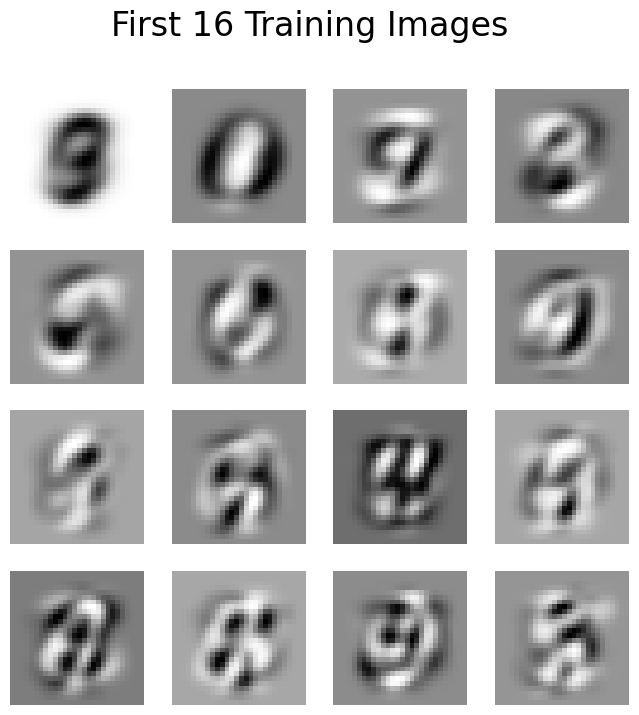

In [8]:
import numpy as np
import struct
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

with open('data/train-images.idx3-ubyte','rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    nrows, ncols = struct.unpack(">II", f.read(8))
    data = np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))
    # print(data.shape)
    Xtraindata = np.transpose(data.reshape((size, nrows*ncols)))

with open('data/train-labels.idx1-ubyte','rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    data = np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))
    ytrainlabels = data.reshape((size,)) # (Optional)

with open('data/t10k-images.idx3-ubyte','rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    nrows, ncols = struct.unpack(">II", f.read(8))
    data = np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))
    Xtestdata = np.transpose(data.reshape((size, nrows*ncols)))

with open('data/t10k-labels.idx1-ubyte','rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    data = np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))
    ytestlabels = data.reshape((size,)) # (Optional)
        

    
traindata_imgs =  np.transpose(Xtraindata).reshape((60000,28,28))    
# print(Xtraindata.shape)
# print(ytrainlabels.shape)
# print(Xtestdata.shape)
# print(ytestlabels.shape)

pca = PCA()
Xtraindata_pca = pca.fit_transform(Xtraindata)

def plot_digits(XX, N, title):
    fig, ax = plt.subplots(N, N, figsize=(8, 8))
    
    for i in range(N):
      for j in range(N):
        ax[i,j].imshow(XX[:,(N)*i+j].reshape((28, 28)), cmap="Greys")
        ax[i,j].axis("off")
    fig.suptitle(title, fontsize=24)

plot_digits(Xtraindata_pca[:, :16], 4, "First 16 Training Images" )

In [9]:
cumulative_energy = np.cumsum(pca.explained_variance_ratio_)

num_components = [np.argmax(cumulative_energy >= 0.85) + 1]

print(num_components)

[np.int64(42)]


In [10]:
def select_subset(Xtrain, ytrain, Xtest, ytest, digits):
    train_digits = np.isin(ytrain, digits)
    test_digits = np.isin(ytest, digits)

    Xtrain_subset = Xtrain[:, train_digits]
    ytrain_subset = ytrain[train_digits]
    Xtest_subset = Xtest[:, test_digits]
    ytest_subset = ytest[test_digits]

    return Xtrain_subset, ytrain_subset, Xtest_subset, ytest_subset

In [11]:
from sklearn.linear_model import RidgeClassifierCV
from sklearn.model_selection import cross_val_score

RidgeCL = RidgeClassifierCV()

for i in [[1, 8], [3, 8], [2, 7]]:
    Xtrain_sub, ytrain_sub, Xtest_sub, ytest_sub = select_subset(Xtraindata, ytrainlabels, Xtestdata, ytestlabels, i)

    RidgeCL.fit(Xtrain_sub.T, ytrain_sub)

    scores = cross_val_score(RidgeCL, Xtrain_sub.T, ytrain_sub, cv=5)
    print(f"Digits Selected - {i}: {scores.mean()} accuracy with a standard deviation of {scores.std()}")


Digits Selected - [1, 8]: 0.9617250122263805 accuracy with a standard deviation of 0.0037776923199952157
Digits Selected - [3, 8]: 0.9566857013113916 accuracy with a standard deviation of 0.00613667808835173
Digits Selected - [2, 7]: 0.9817559801726361 accuracy with a standard deviation of 0.0026819647570556016


In [12]:
Xtrain_sub, ytrain_sub, Xtest_sub, ytest_sub = select_subset(Xtraindata, ytrainlabels, Xtestdata, ytestlabels, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
RidgeCL.fit(Xtrain_sub.T, ytrain_sub)
scores = cross_val_score(RidgeCL, Xtrain_sub.T, ytrain_sub, cv=5)
print(f"All Digits: {scores.mean()} accuracy with a standard deviation of {scores.std()}")

All Digits: 0.8488333333333333 accuracy with a standard deviation of 0.008594571930391093


In [13]:
from sklearn.neighbors import KNeighborsClassifier
    
KNNCLk = KNeighborsClassifier(n_neighbors=3)
scorescv = cross_val_score(KNNCLk, Xtrain_sub.T, ytrain_sub,cv=5)
print("{} accuracy with a standard deviation of {}".format(scorescv.mean(), scorescv.std()))


0.9700666666666666 accuracy with a standard deviation of 0.0011695203195232586
